In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import math
import cv2
import scipy

## Problem 1 - Low Light Image Contrast Enhancement

### 1.1 Contrast Stretching

In [2]:
# The following functions will be needed for this section:

def getHistogram(f, bins_number): # Given an image, return its histogram 
    hist = np.zeros(bins_number) # Get an array (all elements set to zero) of size bins
    for pixel in f: # Loop through image and get total count of pixels 
        hist[pixel] += 1
    return hist 

def cumulativeSum(a): # Function to get the cumulative sum to generate better histograms
    a = iter(a); b = [next(a)];
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

def contrastStretching(f): # Function that applies contrast stretching to an image
    img_cs = np.zeros((f.shape[0],f.shape[1]),dtype = 'uint8') # Create zeros array to store the stretched image
    min_value, max_value = np.percentile(f, (1, 99)) # Set min and max to 1st and 98th percentiles of the image, respectively 
    for i in range(f.shape[0]): # Loop over the row elements in the image
        for j in range(f.shape[1]): # Loop over the column elements in the image
            # Conditions for contrast stretching in input and output image
            if(f[i,j] <= min_value):
                img_cs[i,j] = 0
            elif(f[i,j] > min_value and f[i,j] < max_value):
                img_cs[i,j] = 255 * ((f[i,j]-min_value)/(max_value-min_value))
            elif(f[i,j] >= max_value):
                img_cs[i,j] = 255
    return img_cs.astype('uint8')

In the upcoming sections, images are read in and the contrast stretching function is applied to them. The input (before contrast stretching) and output (after contrast stretching) images are then displayed side-by-side. In addition, histograms representing both images are also displayed side-by-side.

Image 1 Before and After Contrast Stretching: 


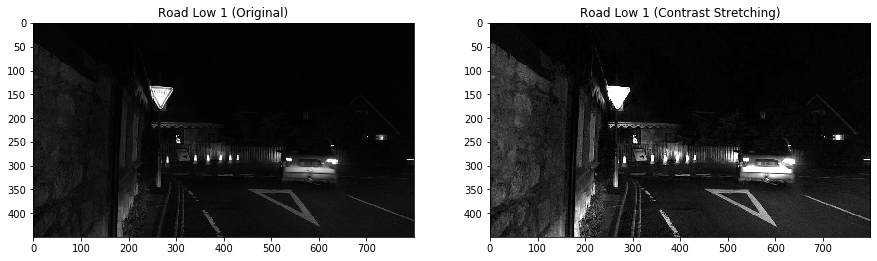

(array([1.17034e+05, 5.26730e+04, 1.78310e+04, 1.62790e+04, 1.75350e+04,
        2.62810e+04, 1.66570e+04, 1.57100e+04, 1.32690e+04, 1.49340e+04,
        7.55800e+03, 9.17000e+03, 4.59700e+03, 3.66000e+03, 4.11100e+03,
        2.01000e+03, 1.62300e+03, 1.33900e+03, 1.57500e+03, 8.74000e+02,
        1.07100e+03, 6.48000e+02, 6.35000e+02, 5.49000e+02, 7.95000e+02,
        5.45000e+02, 5.06000e+02, 7.75000e+02, 4.76000e+02, 5.00000e+02,
        7.09000e+02, 4.60000e+02, 4.16000e+02, 5.88000e+02, 3.20000e+02,
        2.49000e+02, 2.35000e+02, 3.33000e+02, 2.08000e+02, 1.77000e+02,
        2.49000e+02, 1.73000e+02, 2.44000e+02, 1.47000e+02, 1.08000e+02,
        1.11000e+02, 1.70000e+02, 8.30000e+01, 8.90000e+01, 3.71100e+03]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

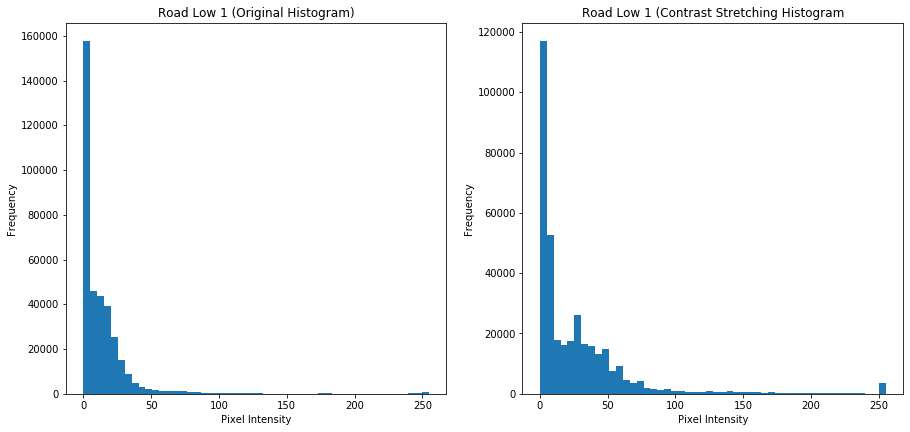

In [3]:
# 1.1.1)

# Display the original image and contrast stretching applied to the image side-by-side

print("Image 1 Before and After Contrast Stretching: ")
img_1 = io.imread('imgs/road_low_1.jpg')
img_1_cs = contrastStretching(img_1)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.title("Road Low 1 (Original)")
plt.imshow(img_1, cmap='gray')
fig.add_subplot(1,2,2)
plt.title("Road Low 1 (Contrast Stretching)")
plt.imshow(img_1_cs, cmap='gray')

plt.show(block=True)

# Display the histogram of the original image, as well as the histogram of the image with contrast strecthing

flat = img_1.flatten() 
hist = getHistogram(flat,256)

flat_cs = img_1_cs.flatten() 
hist_cs = getHistogram(flat_cs,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image histogram
fig.add_subplot(221)
plt.title('Road Low 1 (Original Histogram)')
plt.xlabel('Pixel Intensity'); plt.ylabel('Frequency')
plt.hist(flat, bins=50)

# Plot the contrast stretched histogram
fig.add_subplot(222)
plt.title('Road Low 1 (Contrast Stretching Histogram')
plt.xlabel('Pixel Intensity'); plt.ylabel('Frequency')
plt.hist(flat_cs, bins=50)

The original image is very dark, and the distribution of its histogram is heavily concentrated between the 0th and 50th bin. After contrast stretching has been applied to it, the image is a lot clearer, brighter and one can make out more objects in this image than before contrast stretching was applied to it. This can all be confirmed by looking at the histogram on the right. Although the distribution is still heavily concentrated between the 0th and 50th bins, this distribution is more 'spread out' than the one on the left.

Image 2 Before and After Contrast Stretching: 


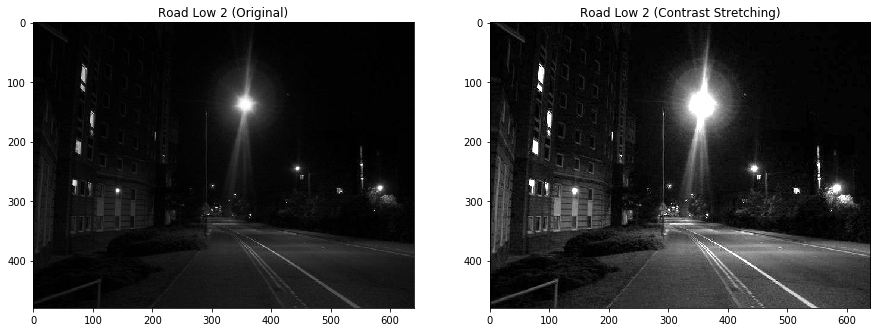

(array([73345., 42697., 28417., 22616.,  7816., 12844.,  9899.,  8480.,
         7899.,  8298.,  8062.,  7363.,  7437.,  7676.,  7099.,  6159.,
         4993.,  4108.,  3482.,  2918.,  2670.,  2522.,  2262.,  2005.,
         1695.,  1441.,  1365.,   663.,  1138.,  1030.,  1184.,   523.,
          236.,   369.,   342.,   315.,   273.,   250.,   211.,   270.,
          272.,   270.,   225.,   227.,   153.,   153.,   141.,   116.,
          120.,  3151.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

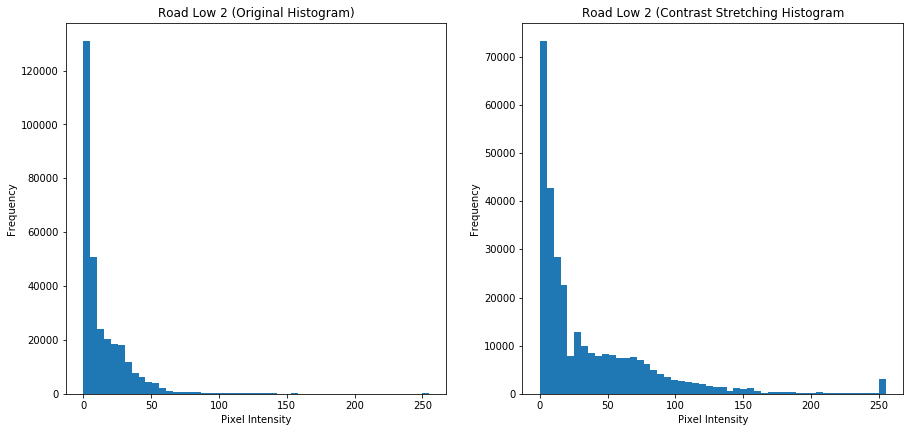

In [4]:
# 1.1.2)

# Display the original image and contrast stretching applied to the image side-by-side

print("Image 2 Before and After Contrast Stretching: ")
img_2 = io.imread('imgs/road_low_2.jpg')
img_2_cs = contrastStretching(img_2)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.title("Road Low 2 (Original)")
plt.imshow(img_2, cmap='gray')
fig.add_subplot(1,2,2)
plt.title("Road Low 2 (Contrast Stretching)")
plt.imshow(img_2_cs, cmap='gray')

plt.show(block=True)

# Display the histogram of the original image, as well as the histogram of the image with contrast strecthing

flat = img_2.flatten() 
hist = getHistogram(flat,256)

flat_cs = img_2_cs.flatten() 
hist_cs = getHistogram(flat_cs,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image histogram
fig.add_subplot(221)
plt.title('Road Low 2 (Original Histogram)')
plt.xlabel('Pixel Intensity'); plt.ylabel('Frequency')
plt.hist(flat, bins=50)

# Plot the contrast stretched histogram
fig.add_subplot(222)
plt.title('Road Low 2 (Contrast Stretching Histogram')
plt.xlabel('Pixel Intensity'); plt.ylabel('Frequency')
plt.hist(flat_cs, bins=50)

Similarly as in 1.1.1) The original image is very dark, and the distribution of its histogram is heavily concentrated between the 0th and 50th bin. After contrast stretching has been applied to it, the image is a lot clearer and one can make out more objects in this image than before contrast stretching was applied to it. In addition, the brighter parts of the original image have been made even brighter and more intense after constrast stretching. For example, the house and streetlights are brighter in the image on the right than those of the image on the left. You can also make out finer details of the grass in the image on the left than the image on the right. 

This can all be confirmed by looking at the histogram on the right. In this case, the distribution is concentrated between the 0th and 25th bins. From about the 26th to about the 150th bin the distribution of pixel intensity values is more evenly distributed. 

Image 3 Before and After Contrast Stretching: 


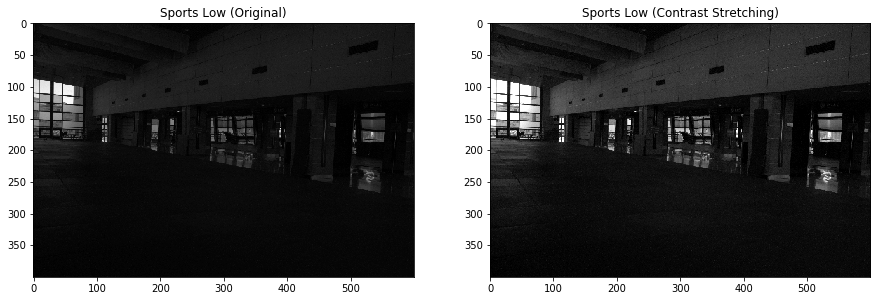

(array([1.9411e+04, 5.1996e+04, 3.1768e+04, 3.6514e+04, 1.5201e+04,
        6.4420e+03, 1.1866e+04, 5.7750e+03, 1.3516e+04, 8.0350e+03,
        1.5259e+04, 7.5970e+03, 1.6950e+03, 2.0690e+03, 7.7200e+02,
        1.2980e+03, 5.6200e+02, 9.5500e+02, 6.5100e+02, 3.2800e+02,
        6.0300e+02, 4.6800e+02, 1.9600e+02, 3.1400e+02, 1.9600e+02,
        4.0400e+02, 1.7200e+02, 3.9500e+02, 1.4200e+02, 3.0100e+02,
        3.1800e+02, 1.3800e+02, 2.6500e+02, 1.3200e+02, 2.5000e+02,
        2.3100e+02, 1.0200e+02, 1.8500e+02, 9.0000e+01, 1.6100e+02,
        1.4000e+02, 6.4000e+01, 1.3100e+02, 6.3000e+01, 1.0000e+02,
        5.1000e+01, 1.0000e+02, 4.9000e+01, 8.0000e+01, 2.4490e+03]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9

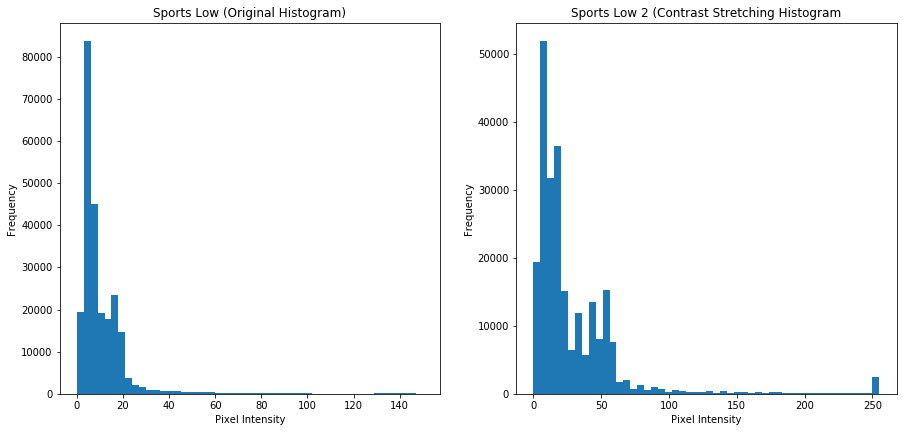

In [5]:
# 1.1.3)

# Display the original image and contrast stretching applied to the image side-by-side

print("Image 3 Before and After Contrast Stretching: ")
img_3 = io.imread('imgs/sports_low.png')
img_3_cs = contrastStretching(img_3)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.title("Sports Low (Original)")
plt.imshow(img_3, cmap='gray')
fig.add_subplot(1,2,2)
plt.title("Sports Low (Contrast Stretching)")
plt.imshow(img_3_cs, cmap='gray')

plt.show(block=True)

# Display the histogram of the original image, as well as the histogram of the image with contrast strecthing

flat = img_3.flatten() 
hist = getHistogram(flat,256)

flat_cs = img_3_cs.flatten() 
hist_cs = getHistogram(flat_cs,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image histogram
fig.add_subplot(221)
plt.title('Sports Low (Original Histogram)')
plt.xlabel('Pixel Intensity'); plt.ylabel('Frequency')
plt.hist(flat, bins=50)

# Plot the contrast stretched histogram
fig.add_subplot(222)
plt.title('Sports Low 2 (Contrast Stretching Histogram')
plt.xlabel('Pixel Intensity'); plt.ylabel('Frequency')
plt.hist(flat_cs, bins=50)

Similarly as in 1.1.1) and 1.1.2) The original image is very dark, and the distribution of its histogram is heavily concentrated between the 0th and 50th bin. After contrast stretching has been applied to it, the image is a lot clearer and one can make out more objects in this image than before contrast stretching was applied to it. After contrast stretching is applied on the image on the right you can make out how the light coming from outside illuminates the gymnasium, and you can better see the equipment in the building. Furthermore, you can make out the finer details of the floor pattern in the second image better than the one of the first image. 

This can all be confirmed by looking at the histogram on the right. In this case, the distribution is heavily concentrated between the 0th and 25th bins. After bin the distribution of pixel intensity values is more evenly distributed. In other implementations one could maybe play around with the min max values to get a better stretching.

### 1.2 Histogram Equalization

In this section, the standard histogram equalization function is applied to all three images to generate their respective output images and histograms. 

Image 1 with its Corresponding Histogram: 


(array([1.57791e+05, 4.60260e+04, 4.38160e+04, 3.91910e+04, 2.53240e+04,
        1.51930e+04, 8.75100e+03, 4.84000e+03, 2.91400e+03, 1.94500e+03,
        1.83200e+03, 1.34000e+03, 1.28100e+03, 1.21400e+03, 1.15600e+03,
        9.51000e+02, 6.32000e+02, 5.41000e+02, 4.26000e+02, 4.17000e+02,
        3.66000e+02, 2.53000e+02, 2.14000e+02, 1.78000e+02, 1.48000e+02,
        1.45000e+02, 1.25000e+02, 1.10000e+02, 1.01000e+02, 1.06000e+02,
        1.27000e+02, 1.01000e+02, 1.05000e+02, 1.11000e+02, 1.48000e+02,
        1.40000e+02, 1.28000e+02, 1.15000e+02, 1.03000e+02, 8.40000e+01,
        7.90000e+01, 6.90000e+01, 7.00000e+01, 6.60000e+01, 7.00000e+01,
        8.00000e+01, 1.12000e+02, 1.56000e+02, 2.18000e+02, 5.91000e+02]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

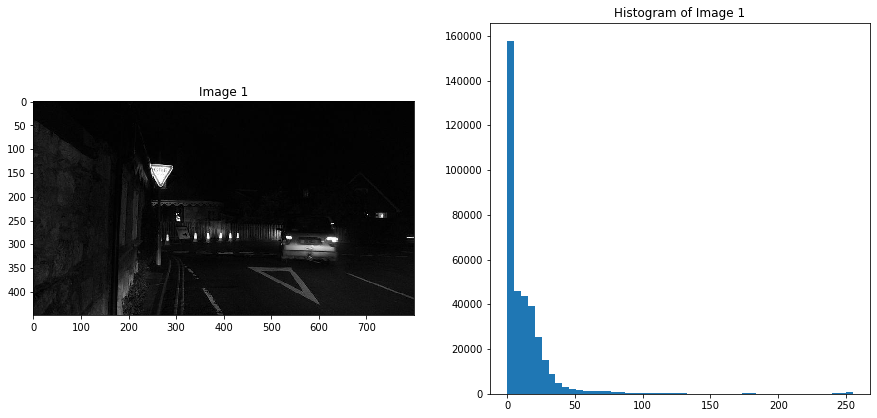

In [6]:
# For image 1 display the original image alongside with it its corresponding histogram
print("Image 1 with its Corresponding Histogram: ")

img_1 = io.imread('imgs/road_low_1.jpg')
flat = img_1.flatten() # Set the image to a 1D array to make the implementation simpler
hist = getHistogram(flat,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image
fig.add_subplot(221)
plt.title('Image 1')
plt.set_cmap('gray')
plt.imshow(img_1)

# Plot the histogram
fig.add_subplot(222)
plt.title('Histogram of Image 1')
plt.hist(flat, bins=50)

In [7]:
cumulative_sum = cumulativeSum(hist) # Get the cumulative sum 

# Apply the Min-Max formula as in contrast stretching section
num = 255 * (cumulative_sum - cumulative_sum.min()); dem = cumulative_sum.max() - cumulative_sum.min();
cumulative_sum = num/dem # re-normalize the cdf
cumulative_sum = cumulative_sum.astype('uint8') # Set cumulativeSum uint8 for proper image represenation

new_img = cumulative_sum[flat] # set new_img to the value from cumulativeSum for every index in the flat array 
new_img = np.reshape(new_img, img_1.shape) # Reshape 1D new_img array to 2D for display purposes

The New Image 1 with its Corresponding Equalized Histogram: 


(array([ 5057.,     0.,     0.,     0.,     0.,     0., 39912.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
        72065.,     0.,     0., 24965.,     0., 15792.,     0., 11916.,
         9640.,  8191.,     0.,  8047.,  8232.,  8701.,  8834.,  8941.,
            0.,  8806.,  8534.,  8359.,  8298.,  8049.,  7661.,  6824.,
         6445.,  5640.,  9294.,  7558.,  6454.,  9244.,  6938.,  7394.,
         7014.,  7195.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

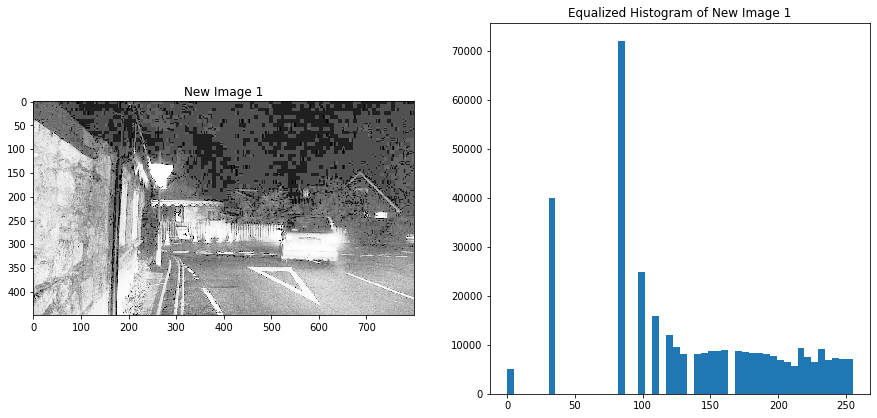

In [8]:
print("The New Image 1 with its Corresponding Equalized Histogram: ")

flat = new_img.flatten() # Set the image to a 1D array to make the implementation simpler
hist = getHistogram(flat,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image
fig.add_subplot(221)
plt.title('New Image 1')
plt.set_cmap('gray')
plt.imshow(new_img)

# Plot the histogram
fig.add_subplot(222)
plt.title('Equalized Histogram of New Image 1')
plt.hist(flat, bins=50)

Image 2 with its Corresponding Histogram: 


(array([1.31067e+05, 5.08170e+04, 2.42300e+04, 2.04780e+04, 1.85810e+04,
        1.80590e+04, 1.19760e+04, 7.77600e+03, 6.07800e+03, 4.40300e+03,
        3.90400e+03, 2.21400e+03, 1.12800e+03, 7.90000e+02, 6.01000e+02,
        6.91000e+02, 5.73000e+02, 3.89000e+02, 2.94000e+02, 2.38000e+02,
        2.57000e+02, 1.85000e+02, 1.75000e+02, 1.38000e+02, 1.21000e+02,
        1.38000e+02, 1.12000e+02, 1.15000e+02, 9.90000e+01, 8.10000e+01,
        1.34000e+02, 9.30000e+01, 9.20000e+01, 8.30000e+01, 7.90000e+01,
        6.90000e+01, 8.30000e+01, 8.80000e+01, 6.80000e+01, 6.20000e+01,
        5.90000e+01, 5.00000e+01, 4.60000e+01, 4.30000e+01, 4.50000e+01,
        4.60000e+01, 4.50000e+01, 5.30000e+01, 8.00000e+01, 1.74000e+02]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

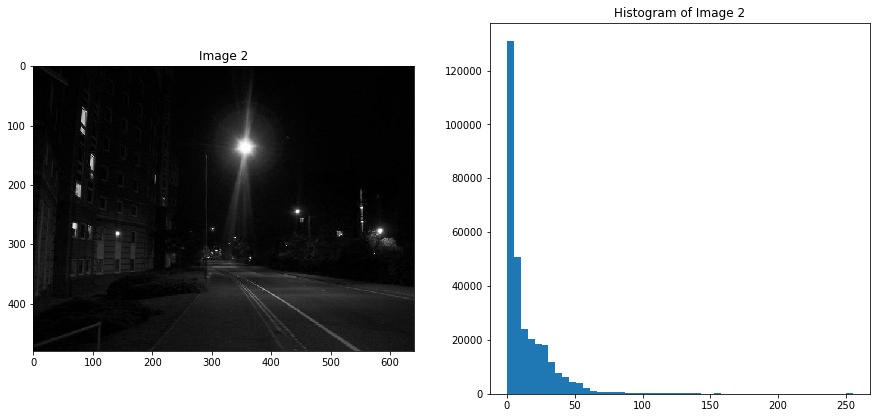

In [9]:
# For image 2 display the original image alongside with it its corresponding histogram
print("Image 2 with its Corresponding Histogram: ")

img_2 = io.imread('imgs/road_low_2.jpg')
flat = img_2.flatten() # Set the image to a 1D array to make the implementation simpler
hist = getHistogram(flat,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image
fig.add_subplot(221)
plt.title('Image 2')
plt.set_cmap('gray')
plt.imshow(img_2)

# Plot the histogram
fig.add_subplot(222)
plt.title('Histogram of Image 2')
plt.hist(flat, bins=50)

In [10]:
cumulative_sum = cumulativeSum(hist) # Get the cumulative sum 

# Apply the Min-Max formula as in contrast stretching section
num = 255 * (cumulative_sum - cumulative_sum.min()); dem = cumulative_sum.max() - cumulative_sum.min();
cumulative_sum = num/dem # re-normalize the cdf
cumulative_sum = cumulative_sum.astype('uint8') # Set cumulativeSum uint8 for proper image represenation

new_img = cumulative_sum[flat] # set new_img to the value from cumulativeSum for every index in the flat array 
new_img = np.reshape(new_img, img_2.shape) # Reshape 1D new_img array to 2D for display purposes

The New Image 2 with its Corresponding Equalized Histogram: 


(array([ 6489.,     0.,     0., 20445.,     0.,     0.,     0.,     0.,
            0.,     0., 46411.,     0.,     0.,     0., 23824.,     0.,
            0.,     0., 18873.,     0., 15025.,     0., 13392.,     0.,
        12517.,     0., 10099.,  7816.,     0.,  6993., 11036.,  4714.,
         4421.,  7988.,  3970.,  8298.,  4281.,  7584.,  3560.,  7437.,
         7676.,  7099.,  3284.,  7868.,  5881.,  6003.,  6078.,  5873.,
         6275.,  5990.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

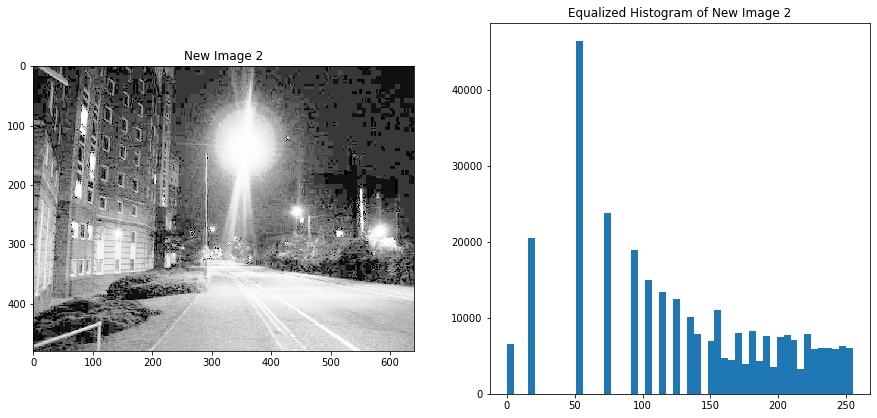

In [11]:
print("The New Image 2 with its Corresponding Equalized Histogram: ")

flat = new_img.flatten() # Set the image to a 1D array to make the implementation simpler
hist = getHistogram(flat,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image
fig.add_subplot(221)
plt.title('New Image 2')
plt.set_cmap('gray')
plt.imshow(new_img)

# Plot the histogram
fig.add_subplot(222)
plt.title('Equalized Histogram of New Image 2')
plt.hist(flat, bins=50)

Image 3 with its Corresponding Histogram: 


(array([1.9411e+04, 8.3764e+04, 4.5056e+04, 1.9234e+04, 1.7784e+04,
        2.3444e+04, 1.4687e+04, 3.7640e+03, 2.0700e+03, 1.5170e+03,
        9.7900e+02, 8.5200e+02, 5.7500e+02, 5.5800e+02, 5.6300e+02,
        4.8800e+02, 4.7300e+02, 4.0300e+02, 3.8200e+02, 3.3300e+02,
        2.7500e+02, 2.3800e+02, 1.9200e+02, 1.7900e+02, 1.4800e+02,
        1.4300e+02, 1.1400e+02, 1.3200e+02, 1.6300e+02, 2.4600e+02,
        1.4900e+02, 9.6000e+01, 1.9700e+02, 8.7000e+01, 1.3000e+01,
        7.0000e+00, 7.0000e+00, 1.3000e+01, 1.0000e+01, 1.0000e+01,
        1.0000e+01, 2.0000e+01, 5.7000e+01, 9.4000e+01, 2.0900e+02,
        2.1700e+02, 2.5000e+02, 1.9100e+02, 1.2700e+02, 6.9000e+01]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
         33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
         66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
         99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
        132., 135., 13

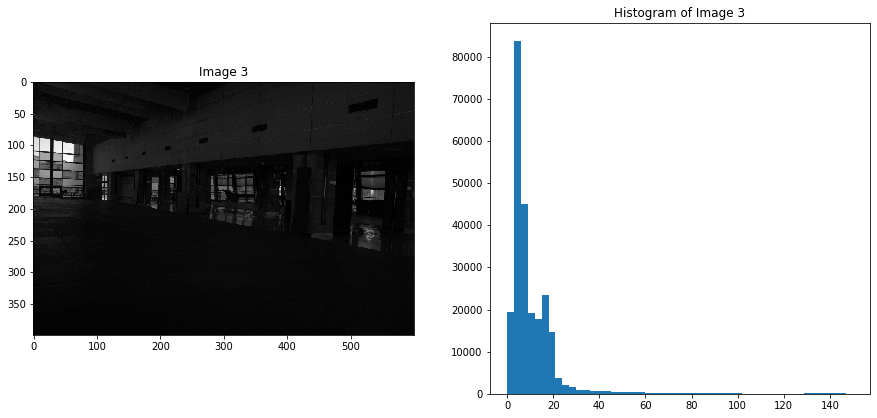

In [12]:
# For image 3 display the original image alongside with it its corresponding histogram
print("Image 3 with its Corresponding Histogram: ")

img_3 = io.imread('imgs/sports_low.png')
flat = img_3.flatten() # Set the image to a 1D array to make the implementation simpler
hist = getHistogram(flat,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image
fig.add_subplot(221)
plt.title('Image 3')
plt.set_cmap('gray')
plt.imshow(img_3)

# Plot the histogram
fig.add_subplot(222)
plt.title('Histogram of Image 3')
plt.hist(flat, bins=50)

In [13]:
cumulative_sum = cumulativeSum(hist) # Get the cumulative sum 

# Apply the Min-Max formula as in contrast stretching section
num = 255 * (cumulative_sum - cumulative_sum.min()); dem = cumulative_sum.max() - cumulative_sum.min();
cumulative_sum = num/dem # re-normalize the cdf
cumulative_sum = cumulative_sum.astype('uint8') # Set cumulativeSum uint8 for proper image represenation

new_img = cumulative_sum[flat] # set new_img to the value from cumulativeSum for every index in the flat array 
new_img = np.reshape(new_img, img_3.shape) # Reshape 1D new_img array to 2D for display purposes

The New Image 3 with its Corresponding Equalized Histogram: 


(array([ 1083.,  6293.,     0., 12035.,     0.,     0.,     0.,     0.,
        21538.,     0.,     0.,     0.,     0.,     0., 30458.,     0.,
            0.,     0.,     0.,     0.,     0., 31768.,     0.,     0.,
            0.,     0., 23101.,     0., 13413.,     0.,  8542.,     0.,
         6659.,  6442.,  6133.,  5733.,     0.,  5775.,  6276.,     0.,
         7240.,  8035.,     0.,  8169.,  7090.,  4825.,  4467.,  5246.,
         4898.,  4781.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patch objects>)

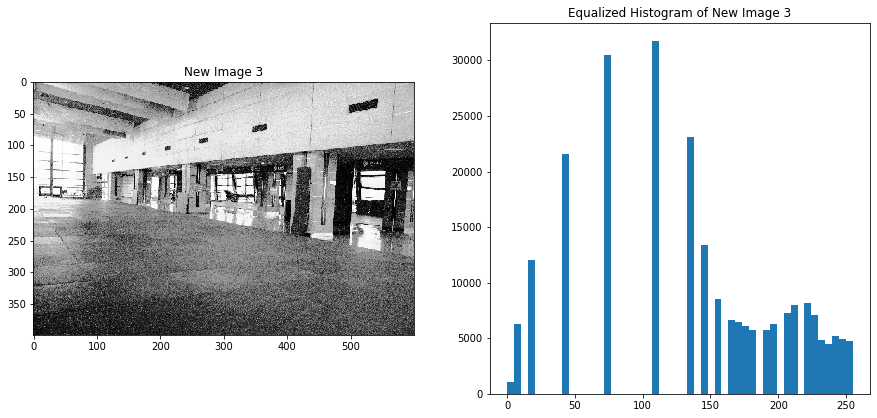

In [14]:
print("The New Image 3 with its Corresponding Equalized Histogram: ")

flat = new_img.flatten() # Set the image to a 1D array to make the implementation simpler
hist = getHistogram(flat,256)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# Plot the original image
fig.add_subplot(221)
plt.title('New Image 3')
plt.set_cmap('gray')
plt.imshow(new_img)

# Plot the histogram
fig.add_subplot(222)
plt.title('Equalized Histogram of New Image 3')
plt.hist(flat, bins=50)

In all three cases the images, as well as their respective histograms were affected. This implies that the gray level values have all been made approximately equally likely (ie: all the levels of the histogram-equalized image span a fuller range of the gray scale). In addition, all of the histograms of the histogram-equalized images are more spread out than their respective input images. 

## 2 - Spatial and Frequency Domain Filtering

### 2.1 Filtering in the Frequency Domain

For this section each image goes through the same process to have a filter applied onto it:

1. Convert the image to single or double
2. Obtain the padding sizes P and Q, and then create the padded image, fp(x, y) using zero padding
3. Compute the DFT, F(u, v), of fp(x, y).
4. Construct the desired filter in frequency domain, H, of the same size as the padded image. 
5. Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication.
6. Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v) 
7. Crop the top left rectangle of gp to obtain an image of the original size
8. Convert the image to the class of the input image

In [15]:
# The following functions are implemented to perform filtering in the frequency domain

def D(p1, p2): # Disance formula between 2 points
    return math.sqrt(math.pow((p1[0]-p2[0]),2)+math.pow((p1[1]-p2[1]),2))


def butterworth_lp(D_zero,img_size,n): # Butterworth function to perform lowpass filter that'll be used to get other filters.
    lp_filter = np.zeros(img_size[:2])
    c = (img_size[0]/2,img_size[1]/2) # Get centre of image
    # Traverse the image
    for i in range(img_size[0]):
        for j in range(img_size[1]):
            lp_filter[i,j] = 1/(1+math.pow((D((i,j),c)/D_zero), (2*n)))
    return lp_filter

2.1.1) The Original Image with Lowpass Filtering (Frequency Domain): 


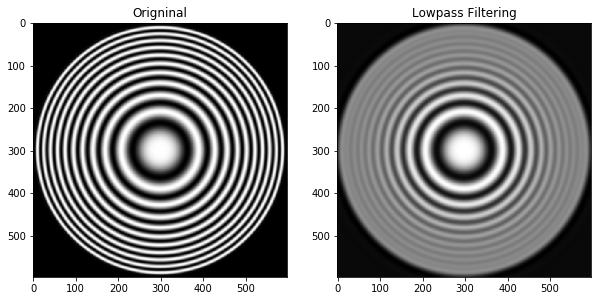

In [16]:
# Generate the output images using the above functions
# 2.1.1)
print("2.1.1) The Original Image with Lowpass Filtering (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * butterworth_lp(47, img.shape, 3) # Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication 

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

G = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Lowpass Filtering")
plt.imshow(np.real(G), cmap=plt.cm.gray)

plt.show(block=True)

2.1.2) The Original Image with Highpass Filtering (Frequency Domain): 


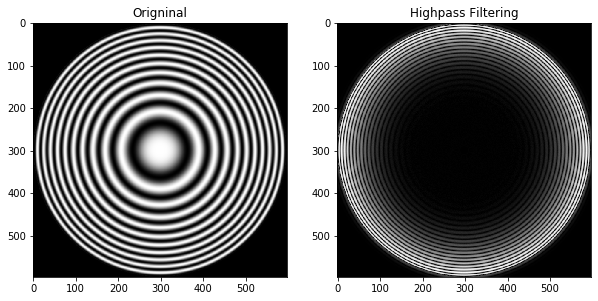

In [17]:
# 2.1.2)
print("2.1.2) The Original Image with Highpass Filtering (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * (1-(butterworth_lp(93, img.shape, 3))) # Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication and lowpass filtering

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

G = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Highpass Filtering")
plt.imshow(np.abs(G), cmap=plt.cm.gray)

plt.show(block=True)

2.1.3) The Original Image with Bandreject Filtering (Frequency Domain): 


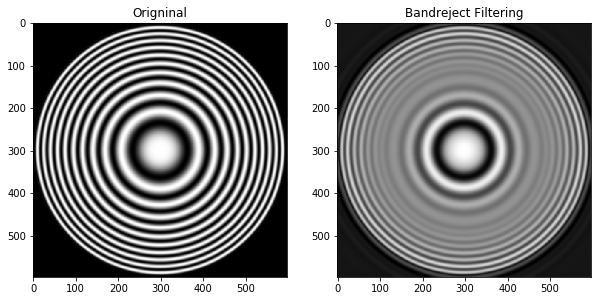

In [18]:
#2.1.3)
# In this case it is simpler to define a new butterworth function for bandreject filter than deriving it from the butterworth_lp 
# function.

def butterworth_br(D_zero,img_size,n): # Butterworth function to perform bandreject filter 
    br_filter = np.zeros(img_size[:2])
    c = (img_size[0]/2,img_size[1]/2) # Get centre of image
    # Traverse the image
    for i in range(img_size[0]):
        for j in range(img_size[1]):
            t = D((i,j),c)
            radius = ((40*t)/(math.pow(t,2)-D_zero**2))
            br_filter[i,j] = 1/(1+((radius**(2*n))))
    return br_filter

print("2.1.3) The Original Image with Bandreject Filtering (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * butterworth_br(50, img.shape, 3) # Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication 

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

G = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Bandreject Filtering")
plt.imshow(np.real(G), cmap=plt.cm.gray)

plt.show(block=True)
    

2.1.4) The Original Image with Bandpass Filtering (Frequency Domain): 


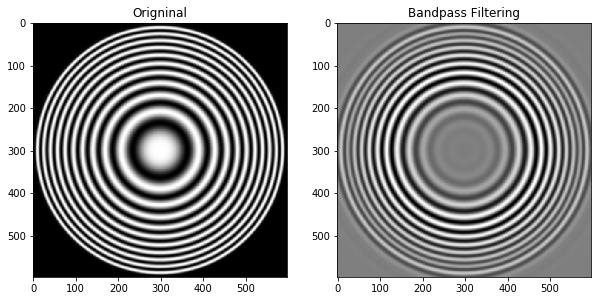

In [19]:
#2.1.4)
print("2.1.4) The Original Image with Bandpass Filtering (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * (1-(butterworth_br(50, img.shape, 2)))

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

G = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Bandpass Filtering")
plt.imshow(np.real(G), cmap=plt.cm.gray)

plt.show(block=True)
    

2.1.5a) The Scaled Highpass and Bandpass Filter Images (Frequency Domain): 


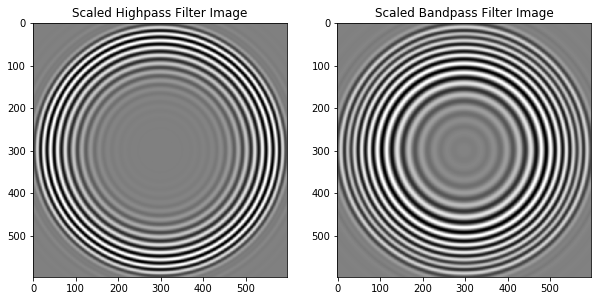

In [20]:
#2.1.5)
print("2.1.5a) The Scaled Highpass and Bandpass Filter Images (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * (1-(butterworth_br(75, img.shape, 3)))

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

highpass_filter_scaled = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * (1-(butterworth_br(55, img.shape, 3)))

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

bandpass_filter_scaled = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Scaled Highpass Filter Image")
plt.imshow(np.real(highpass_filter_scaled), cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Scaled Bandpass Filter Image")
plt.imshow(np.real(bandpass_filter_scaled), cmap=plt.cm.gray)

plt.show(block=True)


### 2.2 Filtering in the Spatial Domain

2.2.1) The Original Image with Lowpass Filtering (Spatial Domain): 


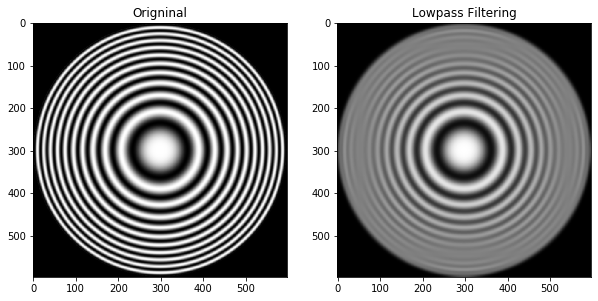

2.2.2) The Original Image with Highpass Filtering (Spatial Domain): 


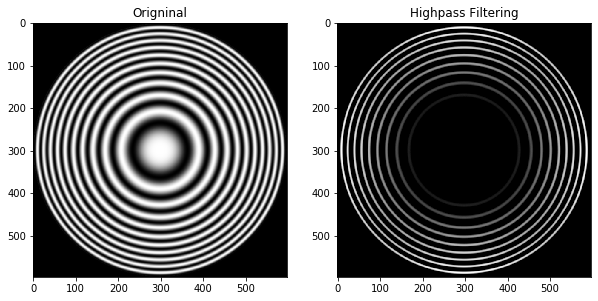

2.2.3) The Original Image with Bandreject Filtering (Spatial Domain): 
2.2.4) The Original Image with Bandpass Filtering (Spatial Domain): 


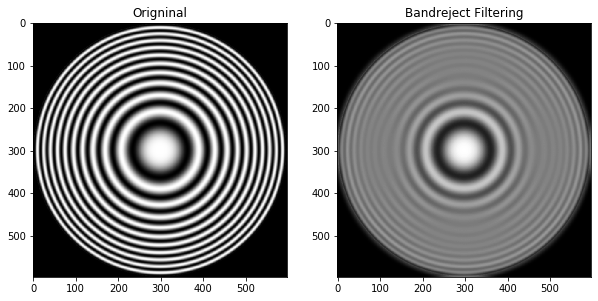

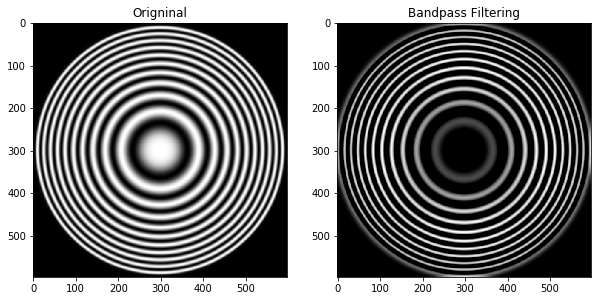

In [21]:
# Use built-in functions to genearate output images, because they generate outputs in the spatial domain
#2.2.1)

print("2.2.1) The Original Image with Lowpass Filtering (Spatial Domain): ")
img = io.imread('imgs/zoneplate.tif')
kernel_lowpass = np.ones((17,17),np.float32)/17**2
lowpass_filter = cv2.filter2D(img,-1,kernel_lowpass)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Lowpass Filtering")
plt.imshow(lowpass_filter, cmap=plt.cm.gray)

plt.show(block=True)

# 2.2.2)
print("2.2.2) The Original Image with Highpass Filtering (Spatial Domain): ")
img = io.imread('imgs/zoneplate.tif')
kernel_highpass = np.zeros((17,17),np.float32)/17**2
x = int(17/2)
kernel_highpass[x,x] = 0.85 # Set the centre value to 0.85 for better results
kernel_highpass = kernel_highpass - kernel_lowpass
highpass_filter = cv2.filter2D(img, -1, kernel_highpass)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Highpass Filtering")
plt.imshow(highpass_filter, cmap=plt.cm.gray)

plt.show(block=True)

# 2.2.3)
print("2.2.3) The Original Image with Bandreject Filtering (Spatial Domain): ")
img = io.imread('imgs/zoneplate.tif')

def gaussianKernel(length, sigma): # Define a function that returns a gaussian kernel
    x = np.linspace(-sigma, sigma, length + 1)
    kernel_1 = np.diff(scipy.stats.norm.cdf(x))
    kernel_2 = np.outer(kernel_1, kernel_1)
    return kernel_2/kernel_2.sum()

# Generate lowpass filters using a gaussian kernel
lowpass_filter1 = gaussianKernel(31,7.5) 
lowpass_filter2 = gaussianKernel(31,1.6)
unit_kernel =  np.zeros((31,31),np.float32)
unit_kernel[15,15] = 0.85 # Use a 0.85 kernel because it has better results
bandreject = unit_kernel - lowpass_filter1 + lowpass_filter2
bandreject_filter = cv2.filter2D(img,-1,bandreject)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Bandreject Filtering")
plt.imshow(bandreject_filter, cmap=plt.cm.gray)

# 2.2.4)
print("2.2.4) The Original Image with Bandpass Filtering (Spatial Domain): ")
img = io.imread('imgs/zoneplate.tif')
lowpass_filter1 = gaussianKernel(31, 1.6) 
lowpass_filter2 = gaussianKernel(31, 7.5)
unit_kernel =  np.zeros((31,31),np.float32)
unit_kernel[15,15] = 0.89 # Use a 0.85 kernel because it has better results
bandreject = unit_kernel - lowpass_filter1 + lowpass_filter2
bandpass = unit_kernel - bandreject
bandpass_filter = cv2.filter2D(img,-1,bandpass)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Bandpass Filtering")
plt.imshow(bandpass_filter, cmap=plt.cm.gray)